### Importing required libraries

In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns


### Picking the first choice door

In [2]:
def your_first_choice():
    """
    Generate random number as first choice of door
    """
    return(random.randrange(1,4)) 

### Picking the door where car is hidden

In [3]:
def car_hidden_door():
    """
    Generate random number for door behind which car is hidden
    
    """
    return(random.randrange(1,4))


### Picking the door to be opened by Monty to reveal the goat

In [4]:
def monty_opened_door(prize_door,choose_door):
    """
    Assigning door to be opened by Monty
    @param prize_door the door where prize is hidden
    @param choose_door the door chosen by competitor
    
    """
    monty_choose_door=random.choice([d for d in range(1,4) if d not in [prize_door,choose_door]])
    return(monty_choose_door)

### Picking the second choice of door, to make the switch

In [5]:
def second_choice(first_choice,monty_door):
    """
    Determining the door to switch 
    @param first_choice the first choice of the competitor
    @param monty_door the door opened by monty to reveal goat
    
    """
    
    switch_door=(set(range(1,4))-{first_choice,monty_door}).pop()
    return(switch_door)
    
    
    

### Function to display bar chart

In [6]:
def show_bar_chart(title, y_label, x_values, y_values, bar_toppers):
    """
    Display a bar chart.
    @param title the chart title.
    @param y_label the label for the y axis
    @param x_values the x values to plot
    @param y_values the y values to plot
    @param bar_toppers the text above each bar
    """
    axes = sns.barplot(x_values, y_values)
    axes.set_title(title)
    axes.set(ylabel=y_label)
    axes.tick_params(left=False,bottom=False)

    # Scale the y-axis by 10% to make room for text above the bars.
    axes.set_ylim(top=1.10*max(y_values))

    # Display the topper text above each patch (bar).
    for bar, topper in zip(axes.patches, bar_toppers):
        text_x = bar.get_x() + bar.get_width()/2  
        text_y = bar.get_height() 
        axes.text(text_x, text_y, topper, 
                  fontsize=11, ha='center', va='bottom')

### Displaying the simulations

In [7]:
count_stay,count_switch=0,0 #setting the counters to count stay and switch count to 0

simulation=100 #numbers of simulations to be performed

col1="Simulation\nindex" 
col2="Car hidden here!"
col3="Your first choice"
col4="Monty opened door"
col5="Your Second choice"
col6="Win if stay?"
col7="Win if switch?\n"
columns=[col1,col2,col3,col4,col5,col6,col7] # Adding header to column
header='  '.join(columns)
print(header)



# calling all functions and performing simulations

for x in range(1,simulation+1):
    chosen_door=your_first_choice()
    prize_door=car_hidden_door()
    monty_chosen_door=monty_opened_door(prize_door,chosen_door)
    switch_door=second_choice(chosen_door,monty_chosen_door)
    
    
    # Determing the stay and switch count
    
    if chosen_door==prize_door:
        win_if_stay='yes'
        count_stay+=1
    else:
        win_if_stay=''
    if prize_door==switch_door:
        win_if_switch='yes'
        count_switch+=1
    else:
        win_if_switch=''
    
    print(f'{x}\t\t {prize_door}\t\t{chosen_door}\t\t{monty_chosen_door}\t\t\t{switch_door} \t\t{win_if_stay} \t\t{win_if_switch}')

# printing the stay count and switch count and Win ratio
print(f'\n{count_stay} wins if you stayed with your first choice\n{count_switch} wins if you switched to your second choice')
print(f'\nWin ratio of switching over staying:{count_switch/count_stay:.2}')




Simulation
index  Car hidden here!  Your first choice  Monty opened door  Your Second choice  Win if stay?  Win if switch?

1		 3		1		2			3 		 		yes
2		 3		1		2			3 		 		yes
3		 3		2		1			3 		 		yes
4		 1		2		3			1 		 		yes
5		 2		3		1			2 		 		yes
6		 2		1		3			2 		 		yes
7		 2		2		3			1 		yes 		
8		 3		2		1			3 		 		yes
9		 3		3		2			1 		yes 		
10		 3		2		1			3 		 		yes
11		 1		3		2			1 		 		yes
12		 1		2		3			1 		 		yes
13		 3		1		2			3 		 		yes
14		 3		3		2			1 		yes 		
15		 1		3		2			1 		 		yes
16		 2		2		3			1 		yes 		
17		 2		1		3			2 		 		yes
18		 1		3		2			1 		 		yes
19		 1		1		2			3 		yes 		
20		 2		1		3			2 		 		yes
21		 2		2		3			1 		yes 		
22		 1		3		2			1 		 		yes
23		 3		1		2			3 		 		yes
24		 1		2		3			1 		 		yes
25		 3		1		2			3 		 		yes
26		 3		3		1			2 		yes 		
27		 1		1		3			2 		yes 		
28		 3		2		1			3 		 		yes
29		 3		3		2			1 		yes 		
30		 1		3		2			1 		 		yes
31		 3		3		1			2 		yes 		
32		 1		1		3			2 		yes 		
33		 3		2		1			3 		 		yes
34		 1		2		3			1 		 		yes
3

### Plotting the simulations

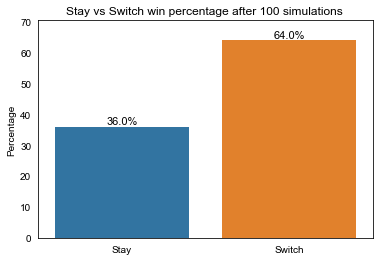

In [8]:

#plotting the simulation result on bar chart
count_values=[count_stay,count_switch]
topper = [f'{value/simulation:.1%}' for value in count_values] #displaying the topper on chart
show_bar_chart(f'Stay vs Switch win percentage after {simulation} simulations ', 'Percentage', ['Stay','Switch'],[(value/simulation)*100 for value in count_values],topper)
sns.set_style('whitegrid')
plt.show()

In [ ]:
#Free Thinkers Team.